In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\Projects\RA\Mini Project\customer personality\marketing_campaign_data_modified.csv')
pd.set_option('display.max_columns', None)
df.sample(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group,Gen_Group,DaysAsCustomer,NumChildren,NumAcceptedCmp,Total_Purchases,Total_Spending,Conversion_Rate
958,S3,Bertunangan,40706000.0,2,1,2013-01-17,37,59000,0,11000,4000,2000,5000,4,3,0,4,7,0,0,0,0,0,0,0,54,Mature,Gen X,3543,3,0,11,81000,0.0
1004,S1,Bertunangan,54165000.0,0,0,2013-05-28,72,127000,4000,73000,15000,6000,11000,1,2,1,7,2,0,0,0,0,0,0,0,53,Mature,Gen X,3412,0,0,11,236000,0.0
1832,S1,Lajang,25008000.0,1,0,2014-02-02,72,2000,8000,8000,6000,1000,9000,2,1,0,3,8,0,0,0,0,0,0,0,34,Adult,Millennials,3162,1,0,6,34000,0.0
1895,S2,Bertunangan,80573000.0,0,0,2012-10-14,85,829000,138000,430000,60000,92000,15000,1,4,6,13,2,0,0,0,0,0,0,0,51,Mature,Gen X,3638,0,0,24,1564000,0.0
657,S3,Menikah,59304000.0,0,1,2013-07-29,81,418000,61000,428000,80000,51000,10000,3,7,8,10,5,0,0,0,0,0,0,0,58,Senior,Boomers,3350,1,0,28,1048000,0.0


In [3]:
df.shape

(2216, 34)

## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Dt_Customer          2216 non-null   object 
 6   Recency              2216 non-null   int64  
 7   MntCoke              2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

### Handle Duplicated Data

In [5]:
df.duplicated().sum()

183

In [6]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(2033, 34)

### Drop Unnecessary Features

In [7]:
df.drop(['Kidhome', 'Teenhome',
       'Dt_Customer', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response'], axis=1, inplace=True)

### Feature Selection

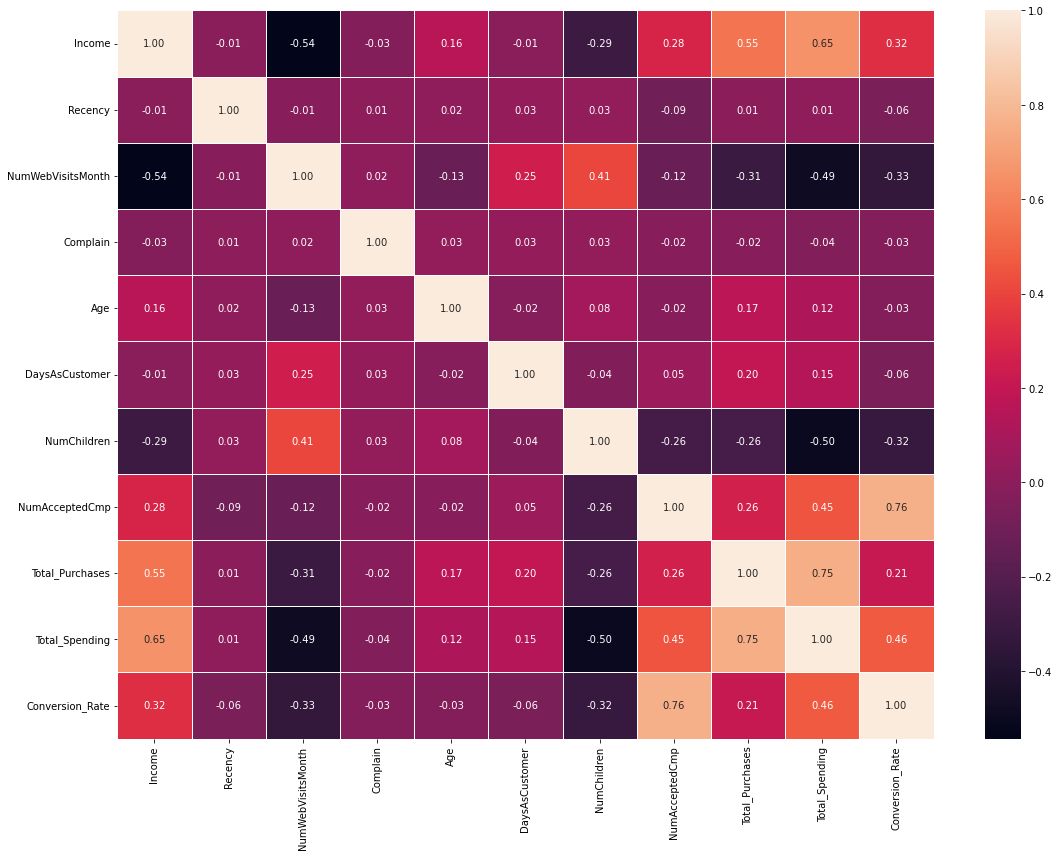

In [8]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=1)
plt.tight_layout()
plt.show()

We're going to use features which are highly correlated to conversion rate as features in clustering:
1. Total_Purchases (Frequency)
2. Total_Spending (Monetary)
3. NumAcceptedCmp (Campaign)

### Handle Outliers

In [9]:
df['F'] = df['Total_Purchases']
df['M'] = df['Total_Spending']
df['C'] = df['NumAcceptedCmp']

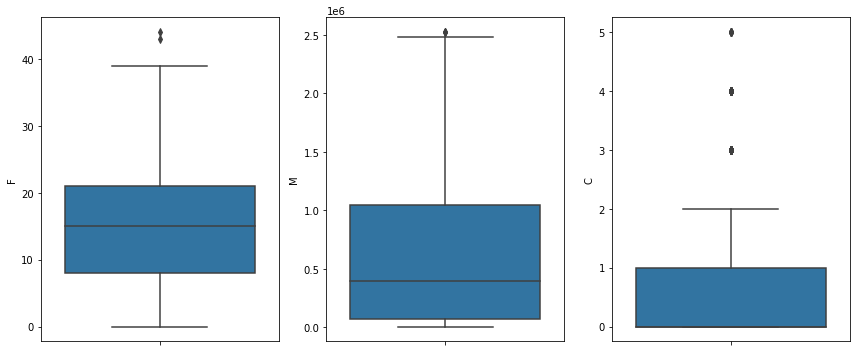

In [10]:
cols = ['F', 'M', 'C']
plt.figure(figsize=(12, 5))
for i in range(len(cols)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[cols[i]])
    plt.tight_layout()

In [11]:
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5*iqr
    up_lim = q3 + 1.5*iqr
    outlier = []
    for x in df[col]:
        if ((x > up_lim) or (x < low_lim)):
            outlier.append(x)
    if len(outlier) != 0 :
        print(f"{col} column has outliers outside lower limit {low_lim} and upper limit {up_lim}")
        print(f"Outliers in {col} column are {len(outlier)}\n")

F column has outliers outside lower limit -11.5 and upper limit 40.5
Outliers in F column are 2

M column has outliers outside lower limit -1399500.0 and upper limit 2516500.0
Outliers in M column are 3

C column has outliers outside lower limit -1.5 and upper limit 2.5
Outliers in C column are 89



In [12]:
df.loc[df['F'] > 40, 'F'] = 40
df.loc[df['M'] > 2516500, 'M'] = 2516500
df.loc[df['C'] > 2, 'C'] = 2

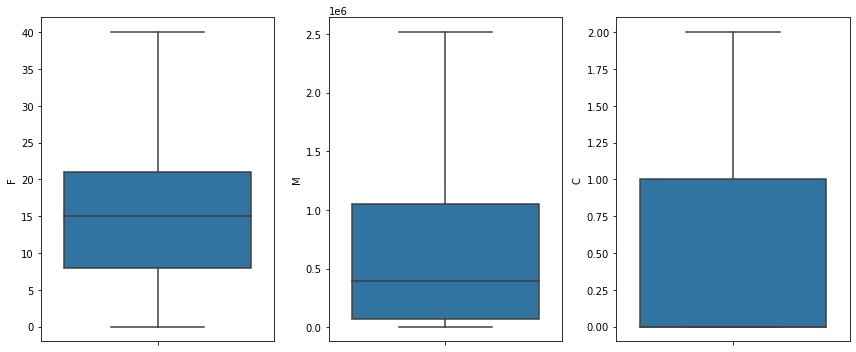

In [13]:
plt.figure(figsize=(12, 5))
for i in range(len(cols)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[cols[i]])
    plt.tight_layout()

### Feature Transformation

In [14]:
df_scaled = df.filter(['F', 'M', 'C'])

In [17]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=['F', 'M', 'C'])
df_scaled.head()

,F,M,C
0,0.625,0.641848,0.5
1,0.150,0.008760,0.0
2,0.525,0.306988,0.0
3,0.200,0.019112,0.0
4,0.475,0.166036,0.0


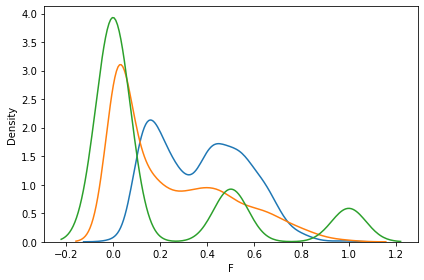

In [18]:
sns.kdeplot(df_scaled['F'])
sns.kdeplot(df_scaled['M'])
sns.kdeplot(df_scaled['C'])
plt.tight_layout()

In [19]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
F,2033.0,0.372110,0.191142,0.0,0.200000,0.375000,0.52500,1.0
M,2033.0,0.239982,0.240354,0.0,0.025483,0.156082,0.41529,1.0
C,2033.0,0.192573,0.336332,0.0,0.000000,0.000000,0.50000,1.0


## Modeling

<AxesSubplot:title={'center':'Inertia Evaluation Score'}>

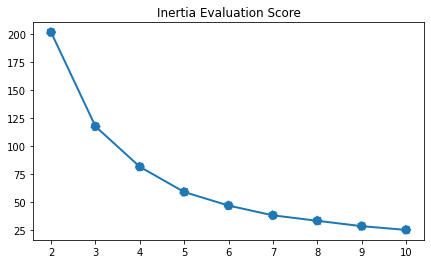

In [20]:
inertia = []
 
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)#, random_state=0)
    kmeans.fit(df_scaled.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.title('Inertia Evaluation Score', fontsize=12)
sns.lineplot(x=range(2, 11), y=inertia, linewidth = 2)
sns.scatterplot(x=range(2, 11), y=inertia, s=100, linestyle='--')

In [21]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    41.689316
1    30.665079
2    27.584243
3    20.535478
4    18.547714
5    12.746327
6    14.400018
7    11.675380
8          NaN
dtype: float64

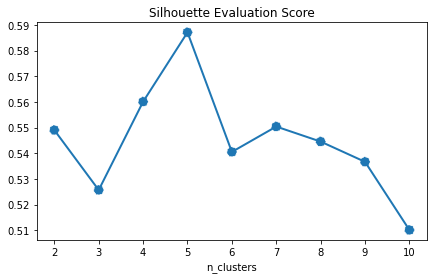

In [22]:
range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_scaled)
    preds = kmeans.predict(df_scaled)
    score_euclidean = silhouette_score(df_scaled, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Silhouette Evaluation Score', fontsize=12)
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean,  linewidth = 2)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=100, linestyle='--')
plt.xlabel('n_clusters')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

df_cluster = df.filter(['Total_Purchases','Total_Spending','NumAcceptedCmp'])
df_cluster.columns = ['F', 'M', 'C']
df_cluster['cluster'] = kmeans.labels_

In [24]:
pca = PCA(n_components=2)

pca.fit(df_scaled)
pcs = pca.transform(df_scaled)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_scaled['cluster']
df_pca.sample(10)

,PC 1,PC 2,cluster
1878,0.567768,0.374312,2
1697,-1.503606,-0.162686,0
1031,-1.508658,-0.179747,0
185,1.530287,-0.200116,3
169,1.535806,-0.205912,3
447,1.533479,-0.223523,3
333,1.533664,-0.227602,3
1222,-1.508601,-0.179439,0
445,-1.508658,-0.179747,0
982,0.589517,0.461015,2


<AxesSubplot:title={'center':'2-D Visualization of Customer Clusters\nWih PCA'}, xlabel='PC 2', ylabel='PC 1'>

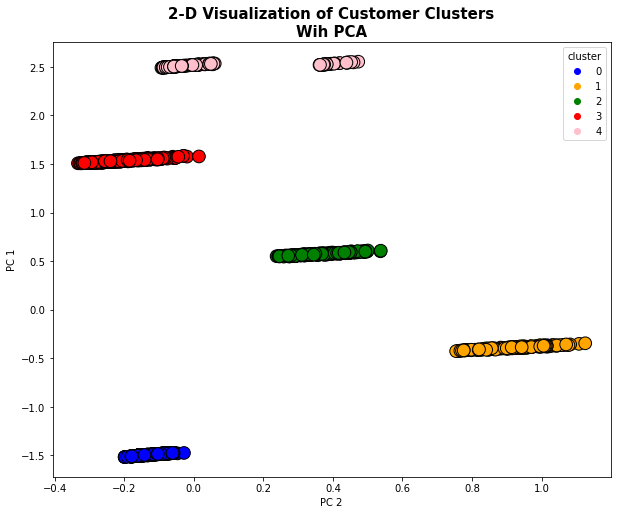

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(y="PC 1", 
                x="PC 2",
                hue="cluster",
                edgecolor='black',
                data=df_pca,
                palette=['blue','orange','green','red','pink'],
                s=160,
                ax=ax)

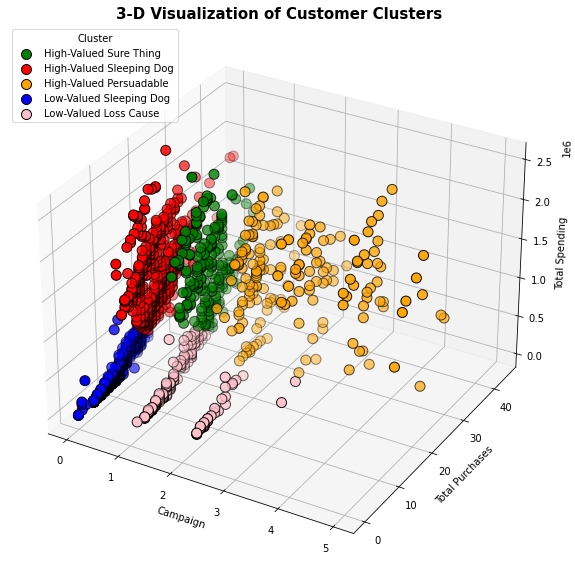

In [64]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters", fontsize=15, weight='bold')
ax.scatter(df_cluster['C'][df_cluster.cluster == 2], df_cluster['F'][df_cluster.cluster == 2], df_cluster['M'][df_cluster.cluster == 2], c='green', s=100, edgecolor='black', label='High-Valued Sure Thing')
ax.scatter(df_cluster['C'][df_cluster.cluster == 3], df_cluster['F'][df_cluster.cluster == 3], df_cluster['M'][df_cluster.cluster == 3], c='red', s=100, edgecolor='black', label='High-Valued Sleeping Dog')
ax.scatter(df_cluster['C'][df_cluster.cluster == 1], df_cluster['F'][df_cluster.cluster == 1], df_cluster['M'][df_cluster.cluster == 1], c='orange', s=100, edgecolor='black', label='High-Valued Persuadable')
ax.scatter(df_cluster['C'][df_cluster.cluster == 0], df_cluster['F'][df_cluster.cluster == 0], df_cluster['M'][df_cluster.cluster == 0], c='blue', s=100, edgecolor='black', label='Low-Valued Sleeping Dog')
ax.scatter(df_cluster['C'][df_cluster.cluster == 4], df_cluster['F'][df_cluster.cluster == 4], df_cluster['M'][df_cluster.cluster == 4], c='pink', s=100, edgecolor='black', label='Low-Valued Loss Cause')

plt.xlabel('Campaign')
plt.ylabel('Total Purchases')
ax.set_zlabel('Total Spending')
plt.legend(title='Cluster', loc='upper left')
plt.show()

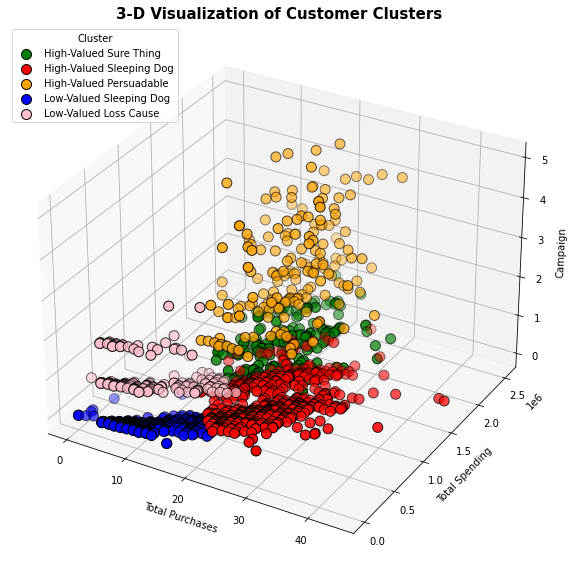

In [63]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters", fontsize=15, weight='bold')
ax.scatter(df_cluster['F'][df_cluster.cluster == 2], df_cluster['M'][df_cluster.cluster == 2], df_cluster['C'][df_cluster.cluster == 2], c='green', s=100, edgecolor='black', label='High-Valued Sure Thing')
ax.scatter(df_cluster['F'][df_cluster.cluster == 3], df_cluster['M'][df_cluster.cluster == 3], df_cluster['C'][df_cluster.cluster == 3], c='red', s=100, edgecolor='black', label='High-Valued Sleeping Dog')
ax.scatter(df_cluster['F'][df_cluster.cluster == 1], df_cluster['M'][df_cluster.cluster == 1], df_cluster['C'][df_cluster.cluster == 1], c='orange', s=100, edgecolor='black', label='High-Valued Persuadable')
ax.scatter(df_cluster['F'][df_cluster.cluster == 0], df_cluster['M'][df_cluster.cluster == 0], df_cluster['C'][df_cluster.cluster == 0], c='blue', s=100, edgecolor='black', label='Low-Valued Sleeping Dog')
ax.scatter(df_cluster['F'][df_cluster.cluster == 4], df_cluster['M'][df_cluster.cluster == 4], df_cluster['C'][df_cluster.cluster == 4], c='pink', s=100, edgecolor='black', label='Low-Valued Loss Cause')
plt.xlabel('Total Purchases')
plt.ylabel('Total Spending')
ax.set_zlabel('Campaign')
plt.legend(title='Cluster', loc='upper left')
plt.show()

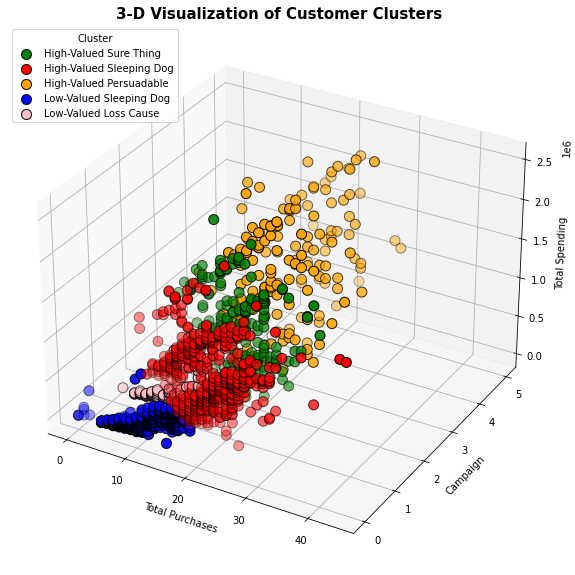

In [62]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters", fontsize=15, weight='bold')
ax.scatter(df_cluster['F'][df_cluster.cluster == 2], df_cluster['C'][df_cluster.cluster == 2], df_cluster['M'][df_cluster.cluster == 2], c='green', s=100, edgecolor='black', label='High-Valued Sure Thing')
ax.scatter(df_cluster['F'][df_cluster.cluster == 3], df_cluster['C'][df_cluster.cluster == 3], df_cluster['M'][df_cluster.cluster == 3], c='red', s=100, edgecolor='black', label='High-Valued Sleeping Dog')
ax.scatter(df_cluster['F'][df_cluster.cluster == 1], df_cluster['C'][df_cluster.cluster == 1], df_cluster['M'][df_cluster.cluster == 1], c='orange', s=100, edgecolor='black', label='High-Valued Persuadable')
ax.scatter(df_cluster['F'][df_cluster.cluster == 0], df_cluster['C'][df_cluster.cluster == 0], df_cluster['M'][df_cluster.cluster == 0], c='blue', s=100, edgecolor='black', label='Low-Valued Sleeping Dog')
ax.scatter(df_cluster['F'][df_cluster.cluster == 4], df_cluster['C'][df_cluster.cluster == 4], df_cluster['M'][df_cluster.cluster == 4], c='pink', s=100, edgecolor='black', label='Low-Valued Loss Cause')
plt.xlabel('Total Purchases')
plt.ylabel('Campaign')
ax.set_zlabel('Total Spending')
plt.legend(title='Cluster', loc='upper left')
plt.show()

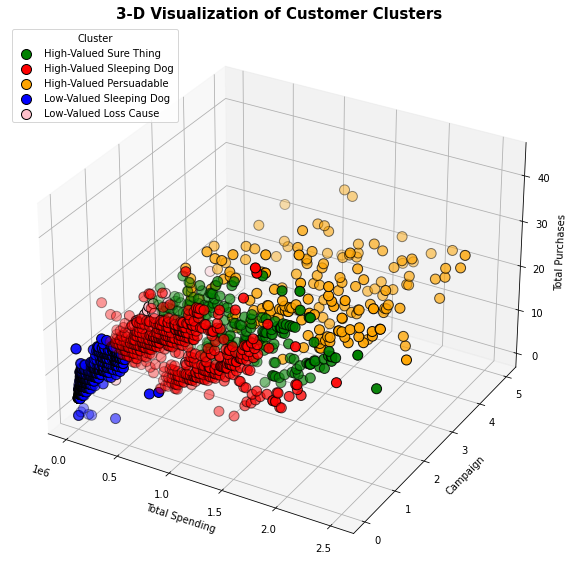

In [61]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters", fontsize=15, weight='bold')
ax.scatter(df_cluster['M'][df_cluster.cluster == 2], df_cluster['C'][df_cluster.cluster == 2], df_cluster['F'][df_cluster.cluster == 2], c='green', s=100, edgecolor='black', label='High-Valued Sure Thing')
ax.scatter(df_cluster['M'][df_cluster.cluster == 3], df_cluster['C'][df_cluster.cluster == 3], df_cluster['F'][df_cluster.cluster == 3], c='red', s=100, edgecolor='black', label='High-Valued Sleeping Dog')
ax.scatter(df_cluster['M'][df_cluster.cluster == 1], df_cluster['C'][df_cluster.cluster == 1], df_cluster['F'][df_cluster.cluster == 1], c='orange', s=100, edgecolor='black', label='High-Valued Persuadable')
ax.scatter(df_cluster['M'][df_cluster.cluster == 0], df_cluster['C'][df_cluster.cluster == 0], df_cluster['F'][df_cluster.cluster == 0], c='blue', s=100, edgecolor='black', label='Low-Valued Sleeping Dog')
ax.scatter(df_cluster['M'][df_cluster.cluster == 4], df_cluster['C'][df_cluster.cluster == 4], df_cluster['F'][df_cluster.cluster == 4], c='pink', s=100, edgecolor='black', label='Low-Valued Loss Cause')
plt.xlabel('Total Spending')
plt.ylabel('Campaign')
ax.set_zlabel('Total Purchases')
plt.legend(title='Cluster', loc='upper left')
plt.show()

### Interpretation

In [30]:
df['Cluster'] = kmeans.labels_

In [31]:
df.sample(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Age,Age_Group,Gen_Group,DaysAsCustomer,NumChildren,NumAcceptedCmp,Total_Purchases,Total_Spending,Conversion_Rate,F,M,C,Cluster
601,S3,Lajang,48240000.0,73,5,0,53,Mature,Gen X,3671,0,1,25,882000,0.2,25,882000,1,2
730,D3,Bertunangan,38702000.0,71,6,0,44,Late Adult,Gen X,3552,1,0,9,109000,0.0,9,109000,0,0
1249,S2,Bertunangan,73450000.0,85,3,0,40,Late Adult,Millennials,3428,0,2,27,1804000,0.7,27,1804000,2,1
747,D3,Menikah,35523000.0,8,7,0,41,Late Adult,Millennials,3491,1,0,8,66000,0.0,8,66000,0,0
1914,S3,Menikah,67472000.0,93,3,0,75,Late Senior,Boomers,3289,1,0,15,414000,0.0,15,414000,0,0


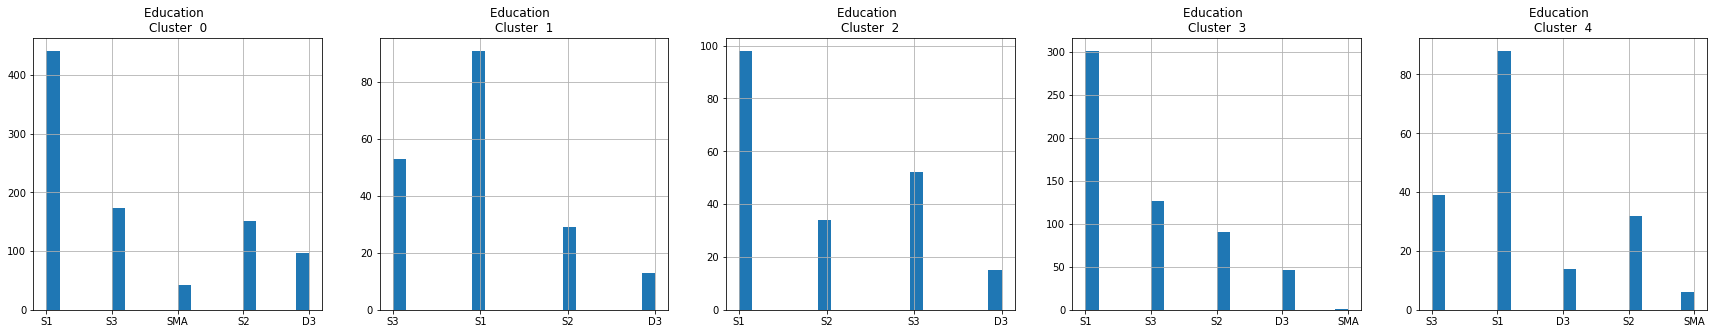

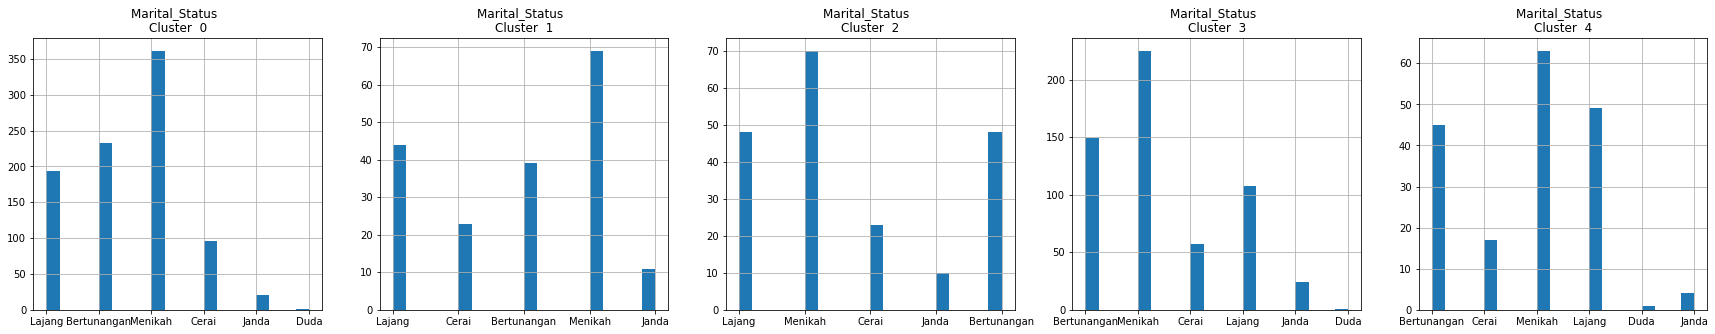

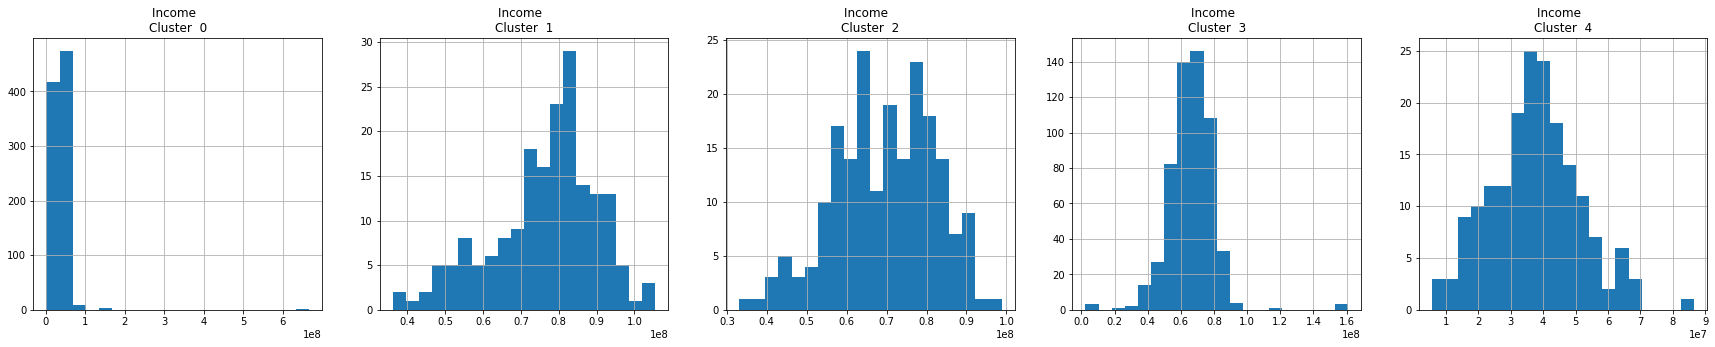

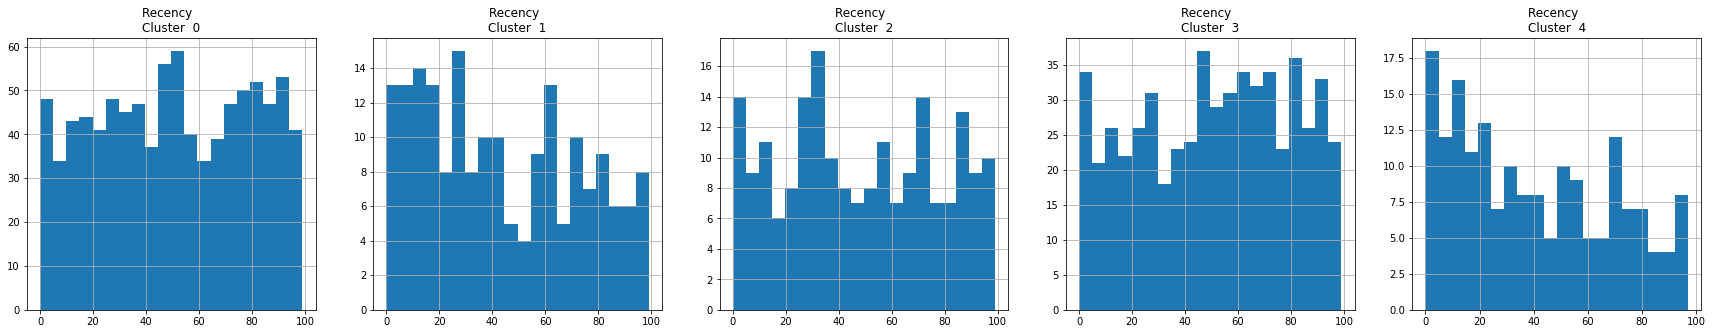

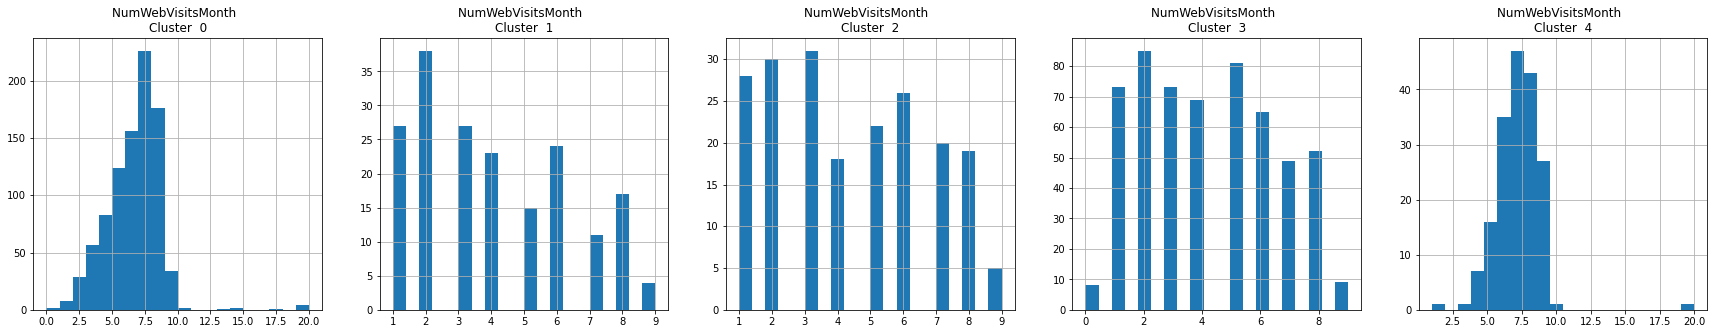

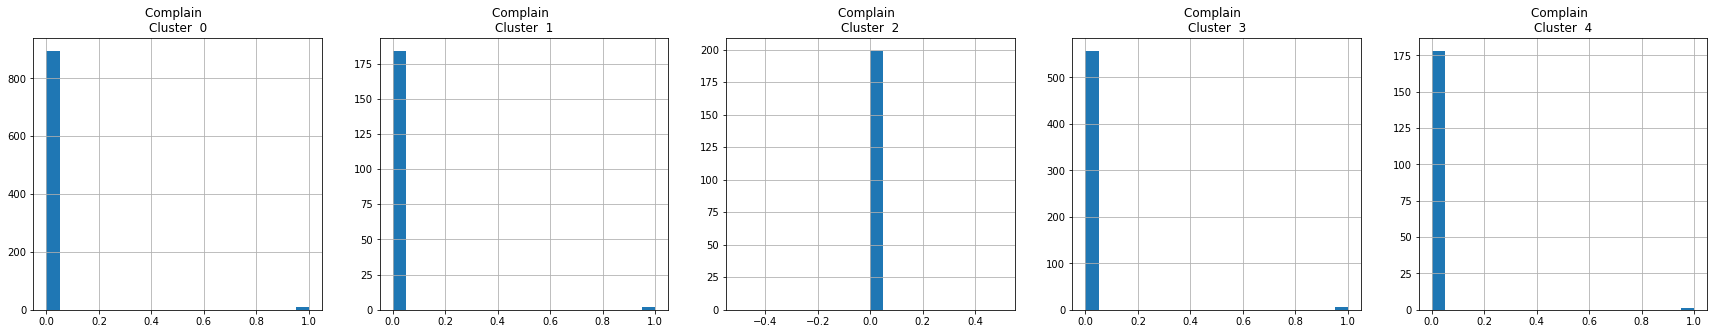

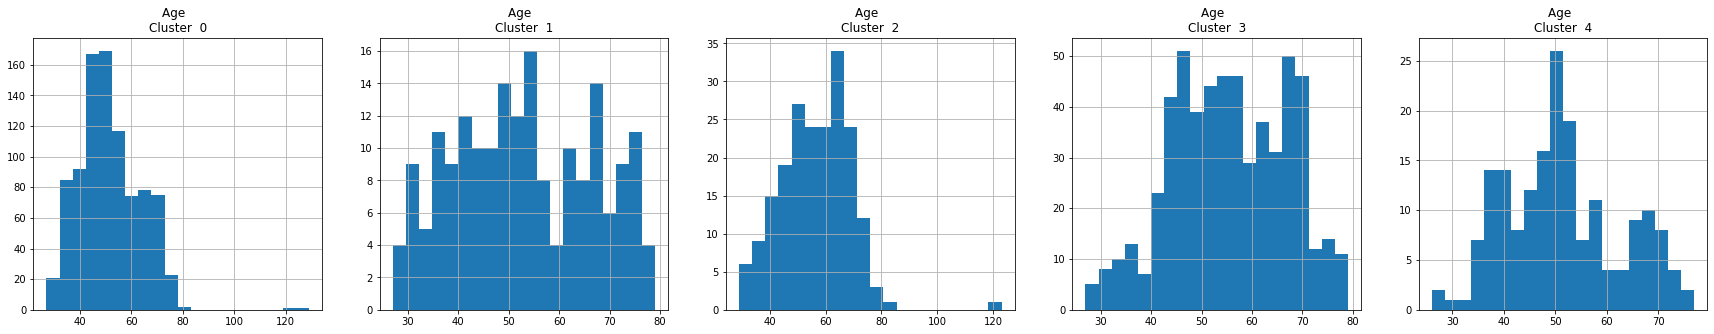

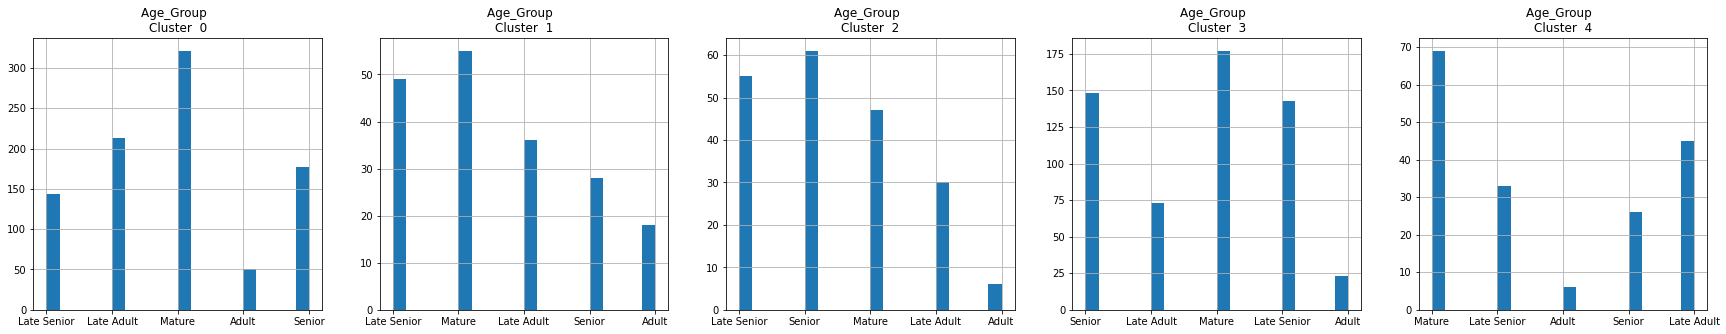

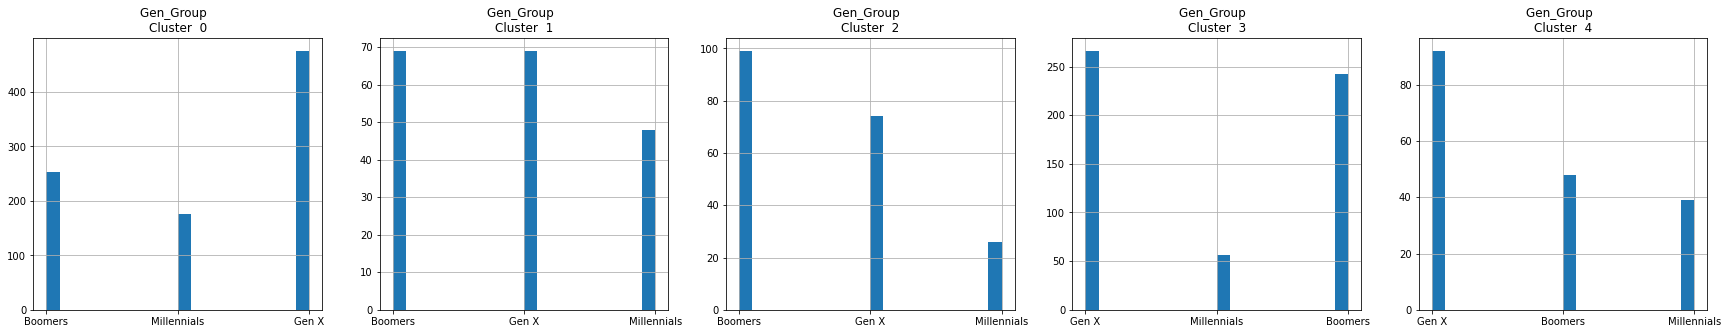

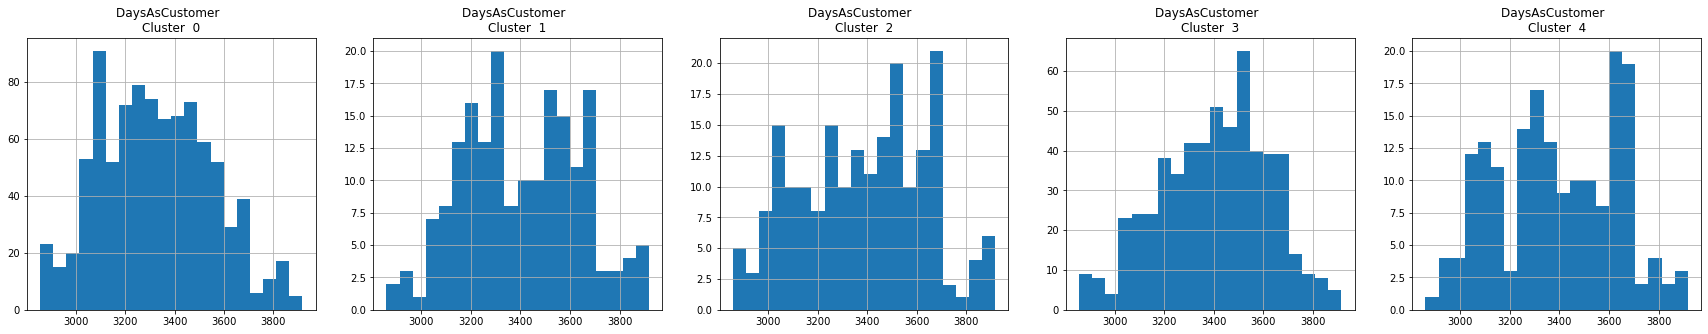

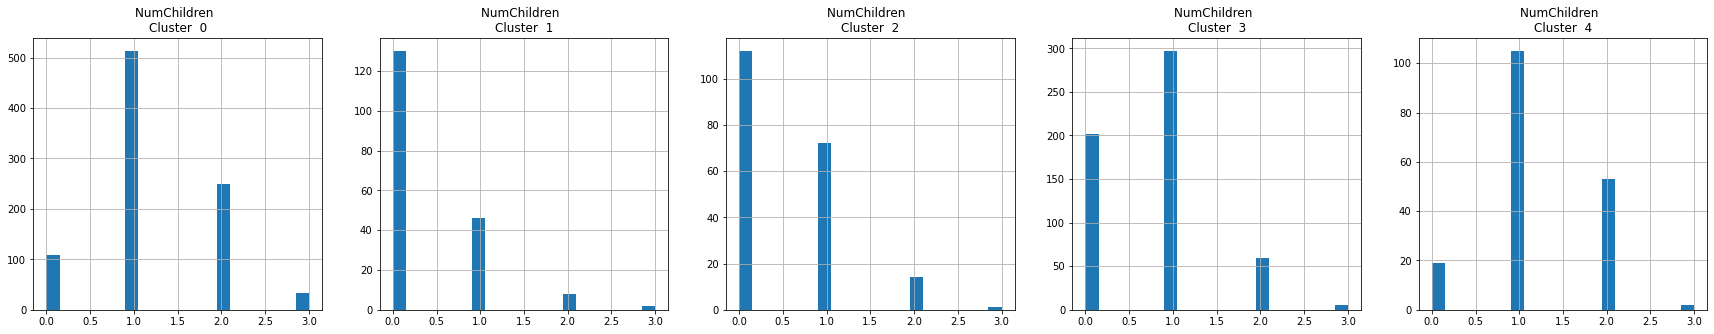

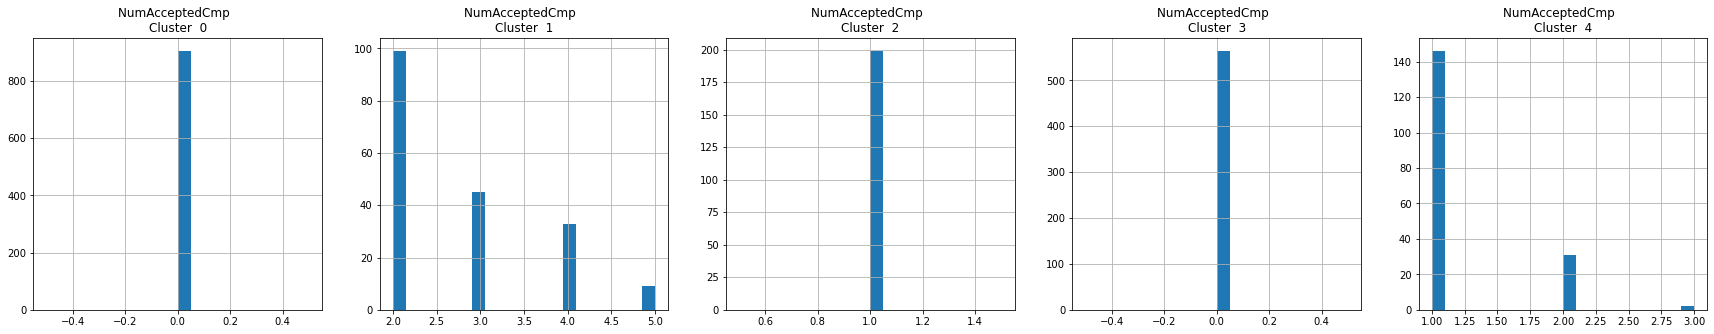

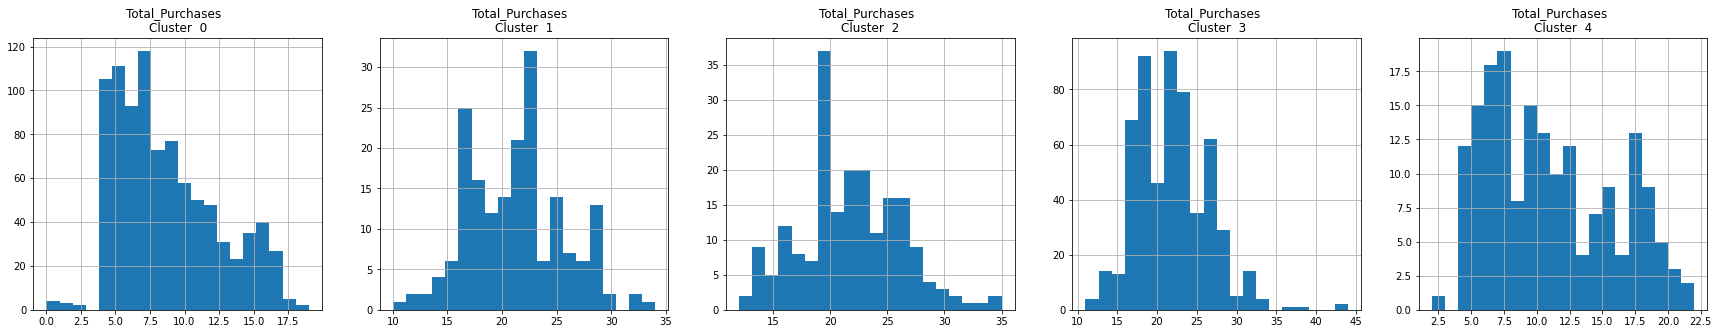

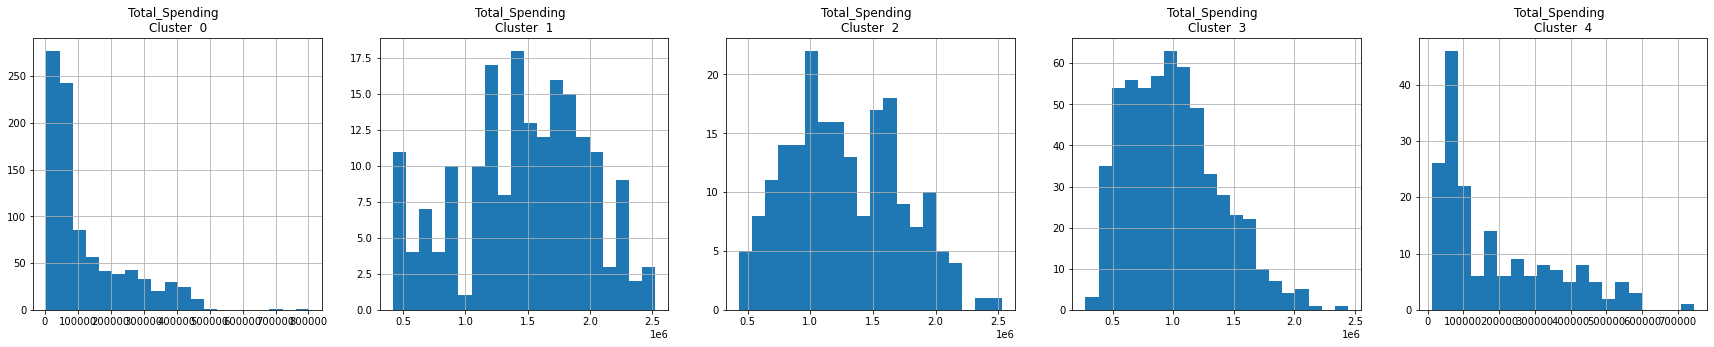

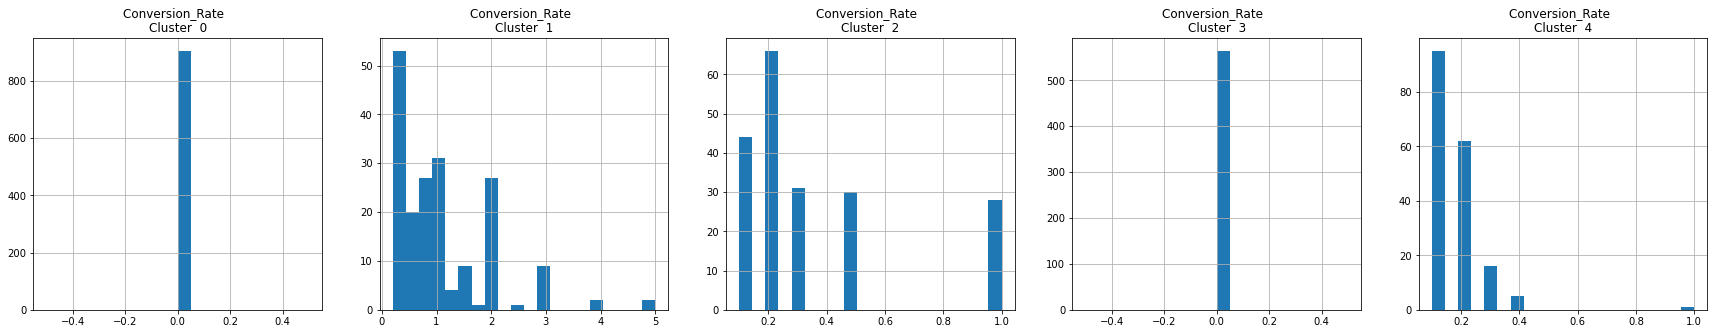

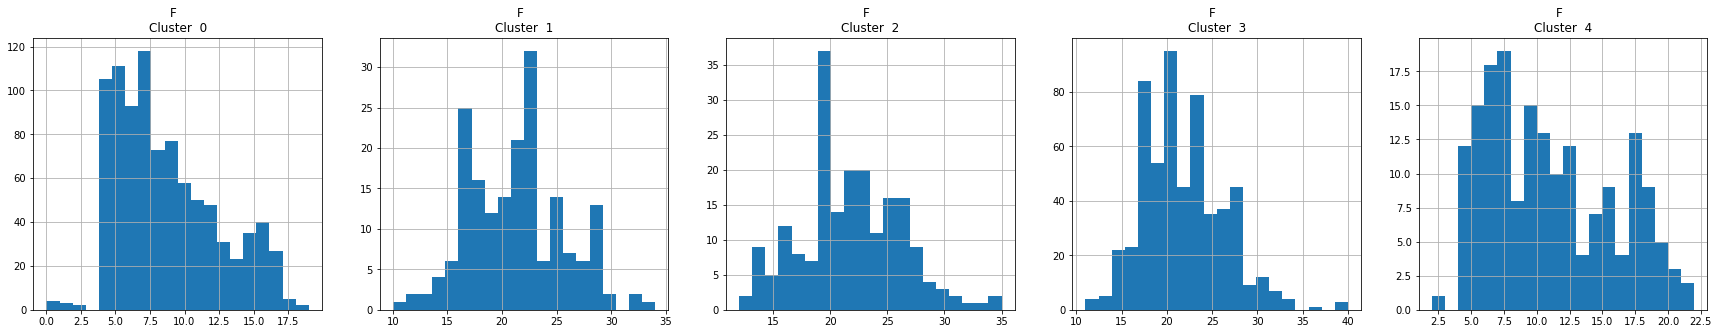

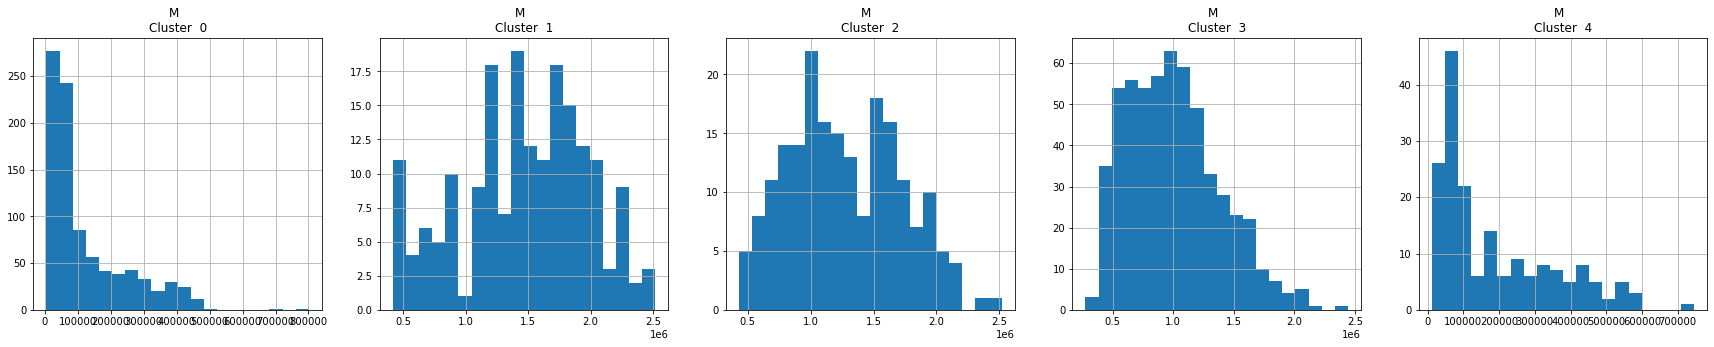

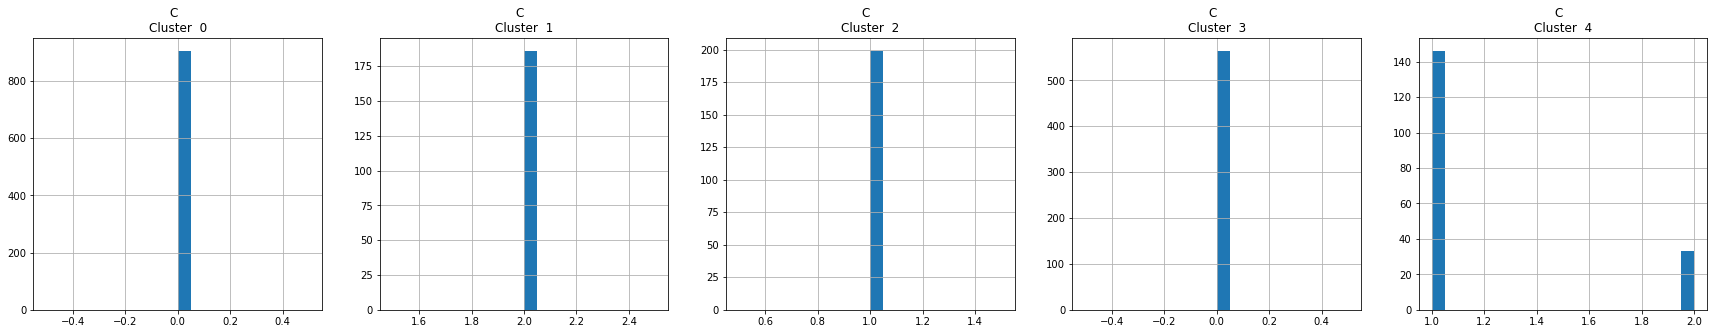

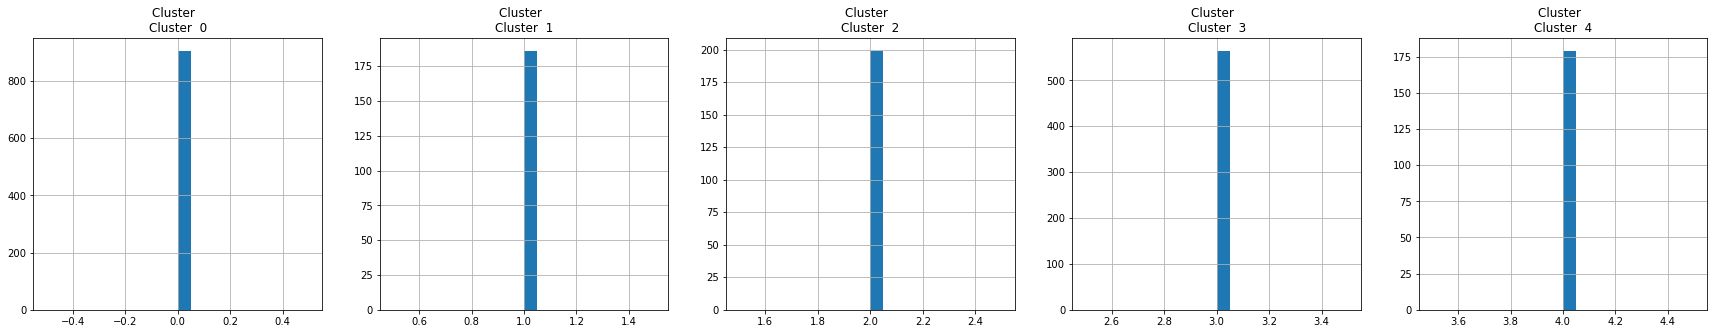

In [32]:
for i in df.columns:
    plt.figure(figsize=(30,5))
    for j in range(5):
        plt.subplot(1,5,j+1)
        cluster = df[df['Cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}  \nCluster  {}'.format(i,j))
    
    plt.show()

In [66]:
num_cols = ['Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Age','DaysAsCustomer',
       'NumChildren', 'NumAcceptedCmp', 'Total_Purchases', 'Total_Spending',
       'Conversion_Rate']
cat_cols = df.select_dtypes(include = ['object','category']).columns

In [74]:
display(df.groupby(['Cluster']).describe())

Income                                                      \
         count          mean           std         min         25%   
Cluster                                                              
0        905.0  3.798147e+07  2.608604e+07   1730000.0  27159000.0   
1        186.0  7.632660e+07  1.376304e+07  36130000.0  69495750.0   
2        199.0  6.949178e+07  1.254574e+07  33051000.0  61038000.0   
3        564.0  6.620316e+07  1.394523e+07   2447000.0  58386000.0   
4        179.0  3.748544e+07  1.379206e+07   5648000.0  28705500.0   

                                             Recency                        \
                50%         75%          max   count       mean        std   
Cluster                                                                      
0        36627000.0  46149000.0  666666000.0   905.0  50.455249  28.760770   
1        78628000.0  84941250.0  105471000.0   186.0  43.236559  29.354459   
2        70440000.0  79140500.0   98777000.0   199.0  48.195980  29.439491   
3        66573500.0  74274250.0  160803000.0   564.0  51.196809  28.451484   
4        37244000.0  46056500.0   86580000.0   179.0  40.094972  28.648723   

                                      NumWebVisitsMonth                      \
         min    25%   50%   75%   max             count      mean       std   
Cluster                                                                       
0        0.0  26.00  50.0  76.0  99.0             905.0  6.162431  2.097492   
1        0.0  17.25  38.5  68.5  99.0             186.0  4.000000  2.329598   
2        0.0  25.00  47.0  73.0  99.0             199.0  4.301508  2.378258   
3        0.0  27.00  53.5  75.0  99.0             564.0  4.207447  2.313267   
4        0.0  14.00  36.0  64.5  97.0             179.0  7.083799  1.744563   

                                  Complain                                     \
         min  25%  50%  75%   max    count      mean       std  min  25%  50%   
Cluster                                                                         
0        0.0  5.0  6.0  7.0  20.0    905.0  0.011050  0.104593  0.0  0.0  0.0   
1        1.0  2.0  4.0  6.0   9.0    186.0  0.010753  0.103415  0.0  0.0  0.0   
2        1.0  2.0  4.0  6.0   9.0    199.0  0.000000  0.000000  0.0  0.0  0.0   
3        0.0  2.0  4.0  6.0   9.0    564.0  0.012411  0.110811  0.0  0.0  0.0   
4        1.0  6.0  7.0  8.0  20.0    179.0  0.005587  0.074744  0.0  0.0  0.0   

                     Age                                                       \
         75%  max  count       mean        std   min   25%   50%   75%    max   
Cluster                                                                         
0        0.0  1.0  905.0  51.500552  11.689959  27.0  44.0  50.0  59.0  129.0   
1        0.0  1.0  186.0  52.946237  13.743099  27.0  41.0  52.0  65.0   79.0   
2        0.0  0.0  199.0  56.512563  12.406360  29.0  48.0  57.0  65.5  123.0   
3        0.0  1.0  564.0  55.459220  11.365716  27.0  47.0  55.0  65.0   79.0   
4        0.0  1.0  179.0  51.245810  10.985993  26.0  43.0  50.0  58.0   77.0   

        DaysAsCustomer                                                    \
                 count         mean         std     min      25%     50%   
Cluster                                                                    
0                905.0  3326.598895  225.744343  2855.0  3149.00  3316.0   
1                186.0  3404.290323  238.308979  2859.0  3219.25  3403.0   
2                199.0  3381.869347  255.795596  2856.0  3172.50  3418.0   
3                564.0  3402.973404  220.183512  2856.0  3241.75  3417.5   
4                179.0  3391.089385  244.633716  2860.0  3183.50  3381.0   

                        NumChildren                                          \
            75%     max       count      mean       std  min  25%  50%  75%   
Cluster                                                                       
0        3487.0  3918.0       905.0  1.229834

In [75]:
display(df.groupby(['Cluster']).describe(include=['object','category']))

Education                 Marital_Status                       \
            count unique top freq          count unique      top freq   
Cluster                                                                 
0             905      5  S1  441            905      6  Menikah  361   
1             186      4  S1   91            186      5  Menikah   69   
2             199      4  S1   98            199      5  Menikah   70   
3             564      5  S1  301            564      6  Menikah  225   
4             179      5  S1   88            179      6  Menikah   63   

        Age_Group                     Gen_Group                       
            count unique     top freq     count unique      top freq  
Cluster                                                               
0             905      5  Mature  321       904      3    Gen X  475  
1             186      5  Mature   55       186      3  Boomers   69  
2             199      5  Senior   61       199      3  Boomers   99  
3             564      5  Mature  177       564      3    Gen X  266  
4             179      5  Mature   69       179      3    Gen X   92

**Customer Clusters:**

* Cluster 0 : Low-valued Sleeping Dog
* Cluster 1 : High-valued Persuadable 
* Cluster 2 : High-valued Sure Thing
* Cluster 3 : High-valued Sleeping Dog
* Cluster 4 : Low-valued Loss Cause

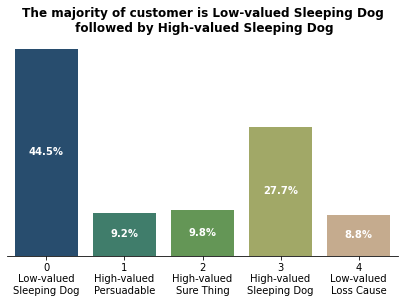

In [56]:
customer = df.groupby('Cluster')['Cluster'].count()/len(df)
customer = customer.to_frame().rename(columns={'Cluster':'%Customer'}).sort_values(by='%Customer',ascending=False).reset_index()

plt.figure(figsize=(7, 4))
ax = sns.barplot(x='Cluster', y='%Customer', data=customer, palette='gist_earth')
plt.title('The majority of customer is Low-valued Sleeping Dog\n followed by High-valued Sleeping Dog', fontweight='bold')
plt.bar_label(ax.containers[0], ['44.5%', '9.2%', '9.8%', '27.7%', '8.8%'], label_type='center',
             color='white', fontweight='bold')
plt.xticks(np.arange(5), ['0\nLow-valued\nSleeping Dog', '1\nHigh-valued\nPersuadable', '2\nHigh-valued\nSure Thing', 
                          '3\nHigh-valued\nSleeping Dog', '4\nLow-valued\nLoss Cause'])
plt.yticks(None)
plt.xlabel(None)
ax.axes.yaxis.set_visible(False)
sns.despine(left=True)

Text(0, 0.5, 'Total Spending')

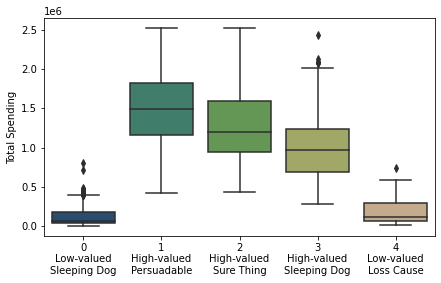

In [57]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(y=df['Total_Spending'], x=df['Cluster'], palette='gist_earth')
plt.xticks(np.arange(5), ['0\nLow-valued\nSleeping Dog', '1\nHigh-valued\nPersuadable', '2\nHigh-valued\nSure Thing', 
                          '3\nHigh-valued\nSleeping Dog', '4\nLow-valued\nLoss Cause'])
plt.xlabel(None)
plt.ylabel('Total Spending')

Text(0, 0.5, 'Total Purchases')

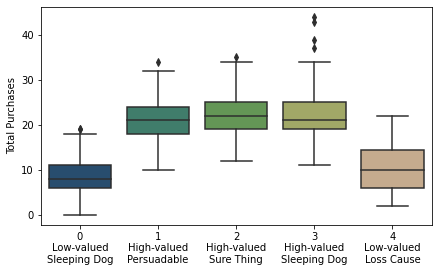

In [58]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(y=df['Total_Purchases'], x=df['Cluster'], palette='gist_earth')
plt.xticks(np.arange(5), ['0\nLow-valued\nSleeping Dog', '1\nHigh-valued\nPersuadable', '2\nHigh-valued\nSure Thing', 
                          '3\nHigh-valued\nSleeping Dog', '4\nLow-valued\nLoss Cause'])
plt.xlabel(None)
plt.ylabel('Total Purchases')

Text(0, 0.5, 'Number of Accepted Campaign')

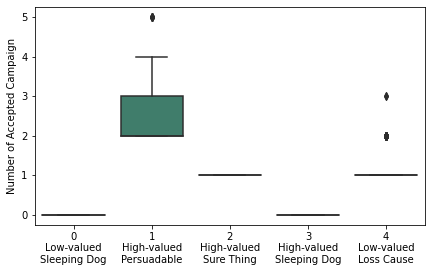

In [59]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(y=df['NumAcceptedCmp'], x=df['Cluster'], palette='gist_earth')
plt.xticks(np.arange(5), ['0\nLow-valued\nSleeping Dog', '1\nHigh-valued\nPersuadable', '2\nHigh-valued\nSure Thing', 
                          '3\nHigh-valued\nSleeping Dog', '4\nLow-valued\nLoss Cause'])
plt.xlabel(None)
plt.ylabel('Number of Accepted Campaign')

Text(0, 0.5, 'Number of Website Visit')

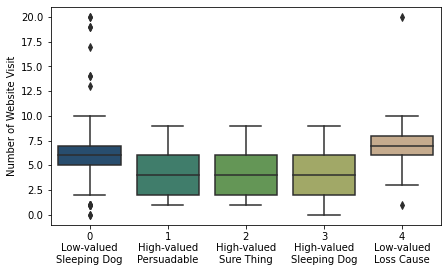

In [79]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(y=df['NumWebVisitsMonth'], x=df['Cluster'], palette='gist_earth')
plt.xticks(np.arange(5), ['0\nLow-valued\nSleeping Dog', '1\nHigh-valued\nPersuadable', '2\nHigh-valued\nSure Thing', 
                          '3\nHigh-valued\nSleeping Dog', '4\nLow-valued\nLoss Cause'])
plt.xlabel(None)
plt.ylabel('Number of Website Visit')

### Summary
_____

1. **Low-valued Sleeping Dogs (Cluster 0)**
    * 44.5% of customers are in this group (905 customers).
    * These customers have the lowest average spending, around USD 124K/year and low average purchase frequency which is only 9x in a year.
    * These customers have no response to any marketing campaigns. Targeting marketing campaigns to these customers only wastes the marketing budget.
    * Have a wide range of number of website visit per month: 20x at most, 6x on average.
    * Dominated by 53% Gen X (42-57 y.o), have average yearly income USD 38M.

____

2. **High-valued Persuadables (Cluster 1)**
    * 9.2% of customers are in this group (186 customers).
    * These customers have the highest average spending, around USD 1.5M/year and high average purchase frequency which is 21x in a year.
    * These customers will respond positively to marketing campaigns. Marketing campaigns can motivate these customers to make more purchases.
    * The average number of website visit is 4x per month.
    * Dominated by 37% Boomers (58 y.o or older), have average yearly income USD 76M.

_____

3. **High-valued Sure Things (Cluster 2)**
    * 9.8% of customers are in this group (199 customers).
    * These customers have high average spending, around USD 1.3M/year and high average purchase frequency which is 22x in a year.
    * These customers will purchase whether there is a marketing campaign or not. Marketing campaigns can't motivate these customers to make a purchase. Still, they will respond positively.
    * The average number of website visit is 4x per month.
    * Dominated by 48% Boomers (58 y.o or older), have average yearly income USD 69M.
    
_____

4. **High-valued Sleeping Dogs (Cluster 3)**
    * 27.7% of customers are in this group (564 customers).
    * These customers have high average spending, around USD 998K/year and high average purchase frequency which is 22x in a year.
    * These customers have no response to any marketing campaigns. Targeting marketing campaigns to these customers only wastes the marketing budget.
    * The average number of website visit is 4x per month.
    * Dominated by 47% Gen X (42-57 y.o), have average yearly income USD 66M.
    
_____

5. **Low-valued Loss Causes (Cluster 4)**
    * 8.8% of customers are in this group (179 customers).
    * These customers have the low average spending, around USD 189K/year and low average purchase frequency which is only 11x in a year.
    * These customers respond to marketing campaigns. However, it doesn't encourage them to spend more. They use campaigns on low-value products, so targeting these customers in a campaign will make a loss.
    * Have a wide range of number of website visit per month: 20x at most, 7x on average.
    * Dominated by 51.4% Gen X (42-57 y.o), have average yearly income USD 37M.


### Treatment Scenarios

Assume that we send a marketing campaign to 2,033 customers, where it costs USD 1 to target each customer, and each successful conversion from a low-valued and high-valued segment has USD 10 revenue and USD 20 revenue. Three scenarios can be applied. These scenarios only include the cost of targeting, and do not include the cost of campaign amounts itself.

1. Do not apply any treatment \
    If we didn't apply any treatment, then the cost of treatment would be zero. The conversions would come from "high-valued sure things" (199 customers), "low-valued sleeping dogs" (905 customers), and "high-valued sleeping dogs" (564 customers), resulting in a profit of USD 24,310.
    
    
2. Apply treatment to all customers \
    If we targeted all customers for treatment, we would have to include the cost of targeting them all. The "high-valued sure things" (199 customers) would still convert, so would the "high-valued persuadables" (186 customers) and "low-valued loss causes" (179 customers). However, we would also drive away the "low-valued sleeping dogs" (905 customers), and "high-valued sleeping dogs" (564 customers). This would result in a profit of USD 7,457.
    
    
3. Apply treatment to the "high-valued persuadables" only \
    The cost of treatment is reduced, because it only applies to 186 customers. We also get the conversions from "high-valued sure things" (199 customers), "high-valued persuadables" (186 customers), "low-valued sleeping dogs" (905 customers), and "high-valued sleeping dogs" (564 customers). However , we would also drive away the "low-valued loss causes" (179 customers). It would give a higher profit of USD 27,844.

In [93]:
dict = {'0': 'Low-valued Sleeping Dog',
        '1': 'High-valued Persuadable',
        '2': 'High-valued Sure Thing',
        '3': 'High-valued Sleeping Dog',
        '4': 'Low-valued Loss Cause'}

total = 0
for i in dict.keys():
    print(f"Total spending of {dict.get(i)} : {df[df['Cluster']==int(i)].Total_Spending.sum()}")
    total += df[df['Cluster']==int(i)].Total_Spending.sum()
print(f"\nTotal Spending : {total}")

Total spending of Low-valued Sleeping Dog : 112589000
Total spending of High-valued Persuadable : 272530000
Total spending of High-valued Sure Thing : 253544000
Total spending of High-valued Sleeping Dog : 563040000
Total spending of Low-valued Loss Cause : 33807000

Total Spending : 1235510000


### Business Recommendations

1. Prioritize High-valued sleeping dogs segment since this segment has the highest total spending, and has the second largest number of customers. Do not send them marketing campaign. Tailoring customer experience using product personalization instead.

2. Targeting marketing campaign to the High-valued Persuadable segment. Marketing campaign can impulse these customers to purchase items on a whim. Flash sales and limited-time offers are two prevalent and effective impulse triggers. Brand campaigns that guarantee the lowest price on certain days and offer seasonal discounts are a few of the mainstream triggers.

3. Apply a retention strategy to the High-valued sure thing segment. Appreciate these customers for their loyalty by rewarding them with loyalty badges and some exclusive privilages. Also keep providing good customer service and delivering great value.

4. Apply a minimum basket size to the Low-valued sleeping dogs segment. Do not send them marketing campaign. Improve customer experience using cross selling and up selling recommendations instead.

5. Targeting a small-amount marketing campaign frequently and apply a minimum basket size to the Low-valued loss causes segment.